# Crash course en Pandas y Plotnine
Pandas es una de las librerias fundamentales para analizar los datos en Python - toma inspiracion de los data frames de R y nos hace la vida facil.

Plotnine es una libreria mucho menos conocida pero vale la pena aprenderlo. Una critica comun de Python para data science es que R tiene mucho mejor capacidad de visualizacion de datos, gracias a la libreria de "ggplot". Ggplot es muy popular por haber inventado una "gramatica" de crear graficos que es muy intuitivo y muy flexible - mientras las opciones más tipicos de Python (matplotlib...) son todo lo opuesto (segun quien preguntas).

Plotnine es basicamente un port de ggplot a Python, entonces ya no tenemos problemas! Te estaras preguntando "si R tiene todo lo bueno y Python lo ha robado de ahi, porque no usamos R?" Por mi lo fuerte de Python no es que sea un lenguaje bueno para analizar datos, pero es un lenguaje bueno para hacer todo lo demas!

No queremos enseñar todo lo que hay, pero vale mucho la pena hacer un crash course para entender el core de estas librerias.

## Versiones??
No vamos a hacer nada que depende mucho de alguna version de Python ni libreria. Con tener una version de Python bastante actualizada basta. Si sois disciplinados y quereis utilizar entornos virtuales - recomiendo conda para trabajar con Jupyter.

In [16]:
from pathlib import Path

import pandas as pd
import plotnine as pn


# Nuestros ficheros
data_loc = Path('../1-descarga-datos/')
handles_file = data_loc / '2021-08-11-handles-data.csv'
tweet_file = data_loc / '2021-08-11-2021-08-12-2021-08-19-tweets-data.csv'

# Algo util para visualizar mas columnas
pd.set_option('display.max_columns', 500)

## Creando data frames
El objeto central de Pandas es el data frame. Es comparable a una "hoja de Excel" y es donde viven nuestros datos. Casi todo lo que vamos a hacer se orientara alrededor de crear un data frame y utilizar funciones del data frame para hacer nuestros analisis.

Lo fundamental es que un data frame tiene filas y columnas. Cada fila tiene un "nombre" que es el index y cada columna tiene un nombre que se refiere como la columna y ya esta. Acedemos a los datos referiendonos a los indices y columnas.

### Como se crean?
Realmente hay varias formas de crear un data frame. Lo mas comun es tener un diccionario de listas donde los "keys" son las columnas y las listas son los datos de cada fila.

Pandas es bastante listo y acepta otros formatos. Lo fundamental es que tiene que entender que son las filas y las columnas. No vamos a cubrir todo porque realmente es mas comun cargar datos directamente (no crear los DFs a mano).

In [3]:
data = {
    'columna_1' : [1, 2, 3, 4, 5],
    'columna_2' : [6, 7, 8, 9, 10],
    'columna_letras' : ['a', 'b', 'c', 'd', 'e'],
}

my_df = pd.DataFrame(data)

my_df

,columna_1,columna_2,columna_letras
0,1,6,a
1,2,7,b
2,3,8,c
3,4,9,d
4,5,10,e


In [4]:
data = [
    (1, 6, 'a'),
    (2, 7, 'b')
]

pd.DataFrame(data, columns=['columna_1', 'columna_2', 'columna_letras'])

,columna_1,columna_2,columna_letras
0,1,6,a
1,2,7,b


## Cargando datos
No es lo mas habitular crear datos asi de esta forma (fuera de los tutoriales) - lo mas tipico es cargar unos datos externos directamente a un data frame. Posibles opciones son:

* Cargar un fichero CSV
* Cargar un JSON grande
* Leer un fichero desde un URL
* Leer datos directamente de una base de datos (lo mas comun en un ambito profesonal)

Vamos a cargar nuestros datos sobre usuarios de Twitter

In [55]:
twitter_users = pd.read_csv(handles_file)
twitter_users

,id,name,username,bio,url,join_datetime,join_date,join_time,tweets,location,following,followers,likes,media,private,verified,avatar,background_image
0,409486555,Michelle Obama,MichelleObama,Girl from the South Side and former First Lady...,https://t.co/HPYP9ad13Y,2011-11-10 20:13:01 UTC,2011-11-10,20:13:01 UTC,1770,"Washington, DC",16,20854298,184,461,False,True,https://pbs.twimg.com/profile_images/136674780...,https://pbs.twimg.com/profile_banners/40948655...
1,19397785,Oprah Winfrey,Oprah,NaN,https://t.co/IKOnfAha8E,2009-01-23 15:18:34 UTC,2009-01-23,15:18:34 UTC,13388,NaN,323,43197469,224,951,False,True,https://pbs.twimg.com/profile_images/112335936...,https://pbs.twimg.com/profile_banners/19397785...
2,21447363,KATY PERRY,katyperry,Love. Light.,https://t.co/Rrwt0Kj2Q7,2009-02-20 23:45:56 UTC,2009-02-20,23:45:56 UTC,11420,NaN,235,108819032,7995,2170,False,True,https://pbs.twimg.com/profile_images/139246535...,https://pbs.twimg.com/profile_banners/21447363...
3,14230524,Lady Gaga,ladygaga,“Chromatica” ⚔️💓 OUT NOW https://t.co/dgVb2x2V...,https://t.co/r5yRJxteLd,2008-03-26 22:37:48 UTC,2008-03-26,22:37:48 UTC,9519,NaN,119314,83675119,2310,1795,False,True,https://pbs.twimg.com/profile_images/142258922...,https://pbs.twimg.com/profile_banners/14230524...
4,16409683,Britney Spears,britneyspears,NaN,https://t.co/v9ZAAXrNtg,2008-09-22 20:47:35 UTC,2008-09-22,20:47:35 UTC,5716,"Los Angeles, CA",367095,55569235,2539,1362,False,True,https://pbs.twimg.com/profile_images/132341880...,https://pbs.twimg.com/profile_banners/16409683...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,841211876776259585,عبدالله بن الحسين,KingAbdullahII,عبدالله بن الحسين، ملك المملكة الأردنية الهاشم...,https://t.co/BrXkntz3j2,2017-03-13 08:58:35 UTC,2017-03-13,08:58:35 UTC,188,Reino Hachemita de Jordania,0,2021450,0,50,False,True,https://pbs.twimg.com/profile_images/845985887...,https://pbs.twimg.com/profile_banners/84121187...
1242,109226167,Mevlüt Çavuşoğlu,MevlutCavusoglu,T.C. Dışişleri Bakanı / Minister of Foreign Af...,https://t.co/XfLchcygHX,2010-01-28 10:50:37 UTC,2010-01-28,10:50:37 UTC,21185,NaN,126,2011441,2314,11365,False,True,https://pbs.twimg.com/profile_images/118200880...,https://pbs.twimg.com/profile_banners/10922616...
1243,444465942,문재인,moonriver365,대한민국 대통령 문재인입니다. President of the Republic of ...,https://t.co/FAKWOwyhHd,2011-12-23 08:46:08 UTC,2011-12-23,08:46:08 UTC,4216,대한민국,141040,1869489,720,2003,False,True,https://pbs.twimg.com/profile_images/798463233...,https://pbs.twimg.com/profile_banners/44446594...
1244,17481977,GOV.UK,GOVUK,Official Twitter channel providing support for...,https://t.co/4KBh38vztU,2008-11-19 07:25:05 UTC,2008-11-19,07:25:05 UTC,19867,UK,680,1849529,152,869,False,True,https://pbs.twimg.com/profile_images/141050879...,https://pbs.twimg.com/profile_banners/17481977...


In [ ]:
tweets = pd.read_csv(tweet_file)
tweets

Ahora si que parece mas interesante! Unas observaciones:

* Como nuestro CSV tiene un formato bien hecho, todas las columnas se han cargado bien como esperamos - hay opciones para adaptar la carga a diferentes formatos
* Cuando carga de un CSV solo infiere que columnas son `str`, `int` y `float`

## Viendo los datos
Es importante "mirar" los datos que tenemos para asegurar que todo tiene sentido. Lo mas comun es imprimir el data frame (como vamos haciendo) o utilizar `head` o `tail` para ver solo unas lineas. Visualizar las columnas es muy similar, simplemente tenemos que referirnos a la columna con el sintaxis standard. Podemos tambien seleccionar varias columnas a la vez.

In [19]:
twitter_users.head()

,id,name,username,bio,url,join_datetime,join_date,join_time,tweets,location,following,followers,likes,media,private,verified,avatar,background_image
0,409486555,Michelle Obama,MichelleObama,Girl from the South Side and former First Lady...,https://t.co/HPYP9ad13Y,2011-11-10 20:13:01 UTC,2011-11-10,20:13:01 UTC,1770,"Washington, DC",16,20854298,184,461,False,True,https://pbs.twimg.com/profile_images/136674780...,https://pbs.twimg.com/profile_banners/40948655...
1,19397785,Oprah Winfrey,Oprah,NaN,https://t.co/IKOnfAha8E,2009-01-23 15:18:34 UTC,2009-01-23,15:18:34 UTC,13388,NaN,323,43197469,224,951,False,True,https://pbs.twimg.com/profile_images/112335936...,https://pbs.twimg.com/profile_banners/19397785...
2,21447363,KATY PERRY,katyperry,Love. Light.,https://t.co/Rrwt0Kj2Q7,2009-02-20 23:45:56 UTC,2009-02-20,23:45:56 UTC,11420,NaN,235,108819032,7995,2170,False,True,https://pbs.twimg.com/profile_images/139246535...,https://pbs.twimg.com/profile_banners/21447363...
3,14230524,Lady Gaga,ladygaga,“Chromatica” ⚔️💓 OUT NOW https://t.co/dgVb2x2V...,https://t.co/r5yRJxteLd,2008-03-26 22:37:48 UTC,2008-03-26,22:37:48 UTC,9519,NaN,119314,83675119,2310,1795,False,True,https://pbs.twimg.com/profile_images/142258922...,https://pbs.twimg.com/profile_banners/14230524...
4,16409683,Britney Spears,britneyspears,NaN,https://t.co/v9ZAAXrNtg,2008-09-22 20:47:35 UTC,2008-09-22,20:47:35 UTC,5716,"Los Angeles, CA",367095,55569235,2539,1362,False,True,https://pbs.twimg.com/profile_images/132341880...,https://pbs.twimg.com/profile_banners/16409683...


In [20]:
twitter_users.name

0          Michelle Obama
1           Oprah Winfrey
2              KATY PERRY
3               Lady Gaga
4          Britney Spears
              ...        
1241    عبدالله بن الحسين
1242     Mevlüt Çavuşoğlu
1243                  문재인
1244               GOV.UK
1245      Nana Akufo-Addo
Name: name, Length: 1246, dtype: object

In [21]:
twitter_users['name']

0          Michelle Obama
1           Oprah Winfrey
2              KATY PERRY
3               Lady Gaga
4          Britney Spears
              ...        
1241    عبدالله بن الحسين
1242     Mevlüt Çavuşoğlu
1243                  문재인
1244               GOV.UK
1245      Nana Akufo-Addo
Name: name, Length: 1246, dtype: object

In [22]:
twitter_users[['name', 'following', 'followers']]

,name,following,followers
0,Michelle Obama,16,20854298
1,Oprah Winfrey,323,43197469
2,KATY PERRY,235,108819032
3,Lady Gaga,119314,83675119
4,Britney Spears,367095,55569235
...,...,...,...
1241,عبدالله بن الحسين,0,2021450
1242,Mevlüt Çavuşoğlu,126,2011441
1243,문재인,141040,1869489
1244,GOV.UK,680,1849529


## Tipos de columnas
Las columnas siempre tienen un "tipo" y va un poco mas alla de los basicos de Python. Podemos ver que tipos tenemos utilizando `dtypes`

In [23]:
twitter_users.dtypes

id                   int64
name                object
username            object
bio                 object
url                 object
join_datetime       object
join_date           object
join_time           object
tweets               int64
location            object
following            int64
followers            int64
likes                int64
media                int64
private             object
verified            object
avatar              object
background_image    object
dtype: object

Segun el tipo, diferentes operaciones hacen cosas distintas...

In [24]:
twitter_users.followers + twitter_users.following

0        20854314
1        43197792
2       108819267
3        83794433
4        55936330
          ...    
1241      2021450
1242      2011567
1243      2010529
1244      1850209
1245      2003815
Length: 1246, dtype: int64

In [25]:
twitter_users.name + twitter_users.bio

0       Michelle ObamaGirl from the South Side and for...
1                                                     NaN
2                                  KATY PERRYLove. Light.
3       Lady Gaga“Chromatica” ⚔️💓 OUT NOW https://t.co...
4                                                     NaN
                              ...                        
1241    عبدالله بن الحسينعبدالله بن الحسين، ملك المملك...
1242    Mevlüt ÇavuşoğluT.C. Dışişleri Bakanı / Minist...
1243    문재인대한민국 대통령 문재인입니다. President of the Republic ...
1244    GOV.UKOfficial Twitter channel providing suppo...
1245    Nana Akufo-AddoOfficial Twitter account of Nan...
Length: 1246, dtype: object

Un tipo importante mencionar es la fecha, declaramos una fecha asi:

In [26]:
pd.to_datetime(twitter_users.join_date)

0      2011-11-10
1      2009-01-23
2      2009-02-20
3      2008-03-26
4      2008-09-22
          ...    
1241   2017-03-13
1242   2010-01-28
1243   2011-12-23
1244   2008-11-19
1245   2011-02-04
Name: join_date, Length: 1246, dtype: datetime64[ns]

In [27]:
pd.to_datetime(twitter_users.join_date).dt.year

0       2011.0
1       2009.0
2       2009.0
3       2008.0
4       2008.0
         ...  
1241    2017.0
1242    2010.0
1243    2011.0
1244    2008.0
1245    2011.0
Name: join_date, Length: 1246, dtype: float64

## Seleccionando los datos
Tenemos que poder seleccionar datos especificos. Hay 2 maneras comunes:

* Seleccionar utilizando el index
* Seleccionar utilizando una condicion / con un `bool`

In [28]:
# Seleccionar con el index
twitter_users.loc[1]

id                                                           19397785
name                                                    Oprah Winfrey
username                                                        Oprah
bio                                                               NaN
url                                           https://t.co/IKOnfAha8E
join_datetime                                 2009-01-23 15:18:34 UTC
join_date                                                  2009-01-23
join_time                                                15:18:34 UTC
tweets                                                          13388
location                                                          NaN
following                                                         323
followers                                                    43197469
likes                                                             224
media                                                             951
private             

El otro caso comun es utilizar una condicion. Podemos comparar una columna contra un valor y nos devuelve algo que se llama una "serie" (como una lista o vector, pero especial de Pandas):

In [30]:
twitter_users.name == 'Oprah Winfrey'

0       False
1        True
2       False
3       False
4       False
        ...  
1241    False
1242    False
1243    False
1244    False
1245    False
Name: name, Length: 1246, dtype: bool

In [36]:
twitter_users.following > 1000

0       False
1       False
2       False
3        True
4        True
        ...  
1241    False
1242    False
1243     True
1244    False
1245    False
Name: following, Length: 1246, dtype: bool

Con esto, podemos simplemente seleccionar las filas donde la comparativa es `True`

In [39]:
twitter_users[twitter_users.name == 'Oprah Winfrey']

,id,name,username,bio,url,join_datetime,join_date,join_time,tweets,location,following,followers,likes,media,private,verified,avatar,background_image
1,19397785,Oprah Winfrey,Oprah,NaN,https://t.co/IKOnfAha8E,2009-01-23 15:18:34 UTC,2009-01-23,15:18:34 UTC,13388,NaN,323,43197469,224,951,False,True,https://pbs.twimg.com/profile_images/112335936...,https://pbs.twimg.com/profile_banners/19397785...
136,19397785,Oprah Winfrey,Oprah,NaN,https://t.co/IKOnfAha8E,2009-01-23 15:18:34 UTC,2009-01-23,15:18:34 UTC,13388,NaN,323,43197473,224,951,False,True,https://pbs.twimg.com/profile_images/112335936...,https://pbs.twimg.com/profile_banners/19397785...


In [40]:
twitter_users.loc[twitter_users.name == 'Oprah Winfrey']

,id,name,username,bio,url,join_datetime,join_date,join_time,tweets,location,following,followers,likes,media,private,verified,avatar,background_image
1,19397785,Oprah Winfrey,Oprah,NaN,https://t.co/IKOnfAha8E,2009-01-23 15:18:34 UTC,2009-01-23,15:18:34 UTC,13388,NaN,323,43197469,224,951,False,True,https://pbs.twimg.com/profile_images/112335936...,https://pbs.twimg.com/profile_banners/19397785...
136,19397785,Oprah Winfrey,Oprah,NaN,https://t.co/IKOnfAha8E,2009-01-23 15:18:34 UTC,2009-01-23,15:18:34 UTC,13388,NaN,323,43197473,224,951,False,True,https://pbs.twimg.com/profile_images/112335936...,https://pbs.twimg.com/profile_banners/19397785...


In [38]:
twitter_users[twitter_users.following > 1000]

,id,name,username,bio,url,join_datetime,join_date,join_time,tweets,location,following,followers,likes,media,private,verified,avatar,background_image
3,14230524,Lady Gaga,ladygaga,“Chromatica” ⚔️💓 OUT NOW https://t.co/dgVb2x2V...,https://t.co/r5yRJxteLd,2008-03-26 22:37:48 UTC,2008-03-26,22:37:48 UTC,9519,NaN,119314,83675119,2310,1795,False,True,https://pbs.twimg.com/profile_images/142258922...,https://pbs.twimg.com/profile_banners/14230524...
4,16409683,Britney Spears,britneyspears,NaN,https://t.co/v9ZAAXrNtg,2008-09-22 20:47:35 UTC,2008-09-22,20:47:35 UTC,5716,"Los Angeles, CA",367095,55569235,2539,1362,False,True,https://pbs.twimg.com/profile_images/132341880...,https://pbs.twimg.com/profile_banners/16409683...
6,35787166,Nicki Minaj,NICKIMINAJ,prolly your obsession,NaN,2009-04-27 16:36:43 UTC,2009-04-27,16:36:43 UTC,42231,Queendom,5767,22418403,88497,3149,False,True,https://pbs.twimg.com/profile_images/139535431...,https://pbs.twimg.com/profile_banners/35787166...
9,34507480,Ariana Grande,ArianaGrande,positions,https://t.co/WHnIWWi55D,2009-04-23 02:56:31 UTC,2009-04-23,02:56:31 UTC,46950,ǝʌɐ uooɯʎǝuoɥ,55953,83945661,43968,3936,False,True,https://pbs.twimg.com/profile_images/134830613...,https://pbs.twimg.com/profile_banners/34507480...
10,27260086,Justin Bieber,justinbieber,JUSTICE the album out now,https://t.co/kobIXw8MJn,2009-03-28 16:41:22 UTC,2009-03-28,16:41:22 UTC,31363,The 6,287772,113927565,4600,2741,False,True,https://pbs.twimg.com/profile_images/136534628...,https://pbs.twimg.com/profile_banners/27260086...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,13623532,Sebastian Piñera,sebastianpinera,Presidente de la República de Chile. Junto a @...,https://t.co/9dlxS7gNp6,2008-02-18 13:59:12 UTC,2008-02-18,13:59:12 UTC,4548,Chile,19665,2494733,2604,1145,False,True,https://pbs.twimg.com/profile_images/130047072...,https://pbs.twimg.com/profile_banners/13623532...
1236,77653794,Iván Duque 🇨🇴,IvanDuque,Presidente de la República de Colombia 🇨🇴 2018...,https://t.co/dgU6HaTLWV,2009-09-27 03:53:46 UTC,2009-09-27,03:53:46 UTC,31765,NaN,1767,2335978,1133,12514,False,True,https://pbs.twimg.com/profile_images/136713235...,https://pbs.twimg.com/profile_banners/77653794...
1238,64798737,Marcelo Ebrard C.,m_ebrard,Secretario de Relaciones Exteriores de México,NaN,2009-08-11 19:31:27 UTC,2009-08-11,19:31:27 UTC,12195,Ciudad de México,1307,2178950,2680,1260,False,True,https://pbs.twimg.com/profile_images/112442922...,https://pbs.twimg.com/profile_banners/64798737...
1239,149991703,Alberto Fernández,alferdez,Abogado. Profesor de Derecho Penal (UBA). Hinc...,https://t.co/1FuikS9nVQ,2010-05-30 19:38:40 UTC,2010-05-30,19:38:40 UTC,29026,Buenos Aires,7203,2113784,8057,2109,False,True,https://pbs.twimg.com/profile_images/119214978...,https://pbs.twimg.com/profile_banners/14999170...


Y si queremos tambien seleccionar una columna (o columnas), hacemos esto con `loc` asi

In [42]:
twitter_users.loc[twitter_users.name == 'Oprah Winfrey', ['username', 'followers']]

,username,followers
1,Oprah,43197469
136,Oprah,43197473


### El index: lo bueno, lo malo, y lo feo...
Para su funcionamiento correcto, Pandas invento un concepto que se llama el "index". El index es un identificador de una fila que permite seleccionar esta fila o hasta "unificar" datos separados haciendo un "join" implicito utilizando este index.

In [57]:
# Example showing selection
twitter_users.loc[range(5, 10)]

,id,name,username,bio,url,join_datetime,join_date,join_time,tweets,location,following,followers,likes,media,private,verified,avatar,background_image
5,26565946,Justin Timberlake,jtimberlake,NaN,https://t.co/ZihLAQPPzw,2009-03-25 19:10:50 UTC,2009-03-25,19:10:50 UTC,4329,"Memphis, TN",324,63446026,1066,622,False,True,https://pbs.twimg.com/profile_images/123209623...,https://pbs.twimg.com/profile_banners/26565946...
6,35787166,Nicki Minaj,NICKIMINAJ,prolly your obsession,NaN,2009-04-27 16:36:43 UTC,2009-04-27,16:36:43 UTC,42231,Queendom,5767,22418403,88497,3149,False,True,https://pbs.twimg.com/profile_images/139535431...,https://pbs.twimg.com/profile_banners/35787166...
7,19248106,Mariah Carey,MariahCarey,My memoir The Meaning of Mariah Carey is in st...,https://t.co/k2HuraD7lN,2009-01-20 18:08:51 UTC,2009-01-20,18:08:51 UTC,10252,Citizen of the World Dahhhling,188,21612341,4346,2504,False,True,https://pbs.twimg.com/profile_images/134656973...,https://pbs.twimg.com/profile_banners/19248106...
8,28706024,P!nk,Pink,it's all happening,https://t.co/jOQtIkWZKG,2009-04-04 01:16:34 UTC,2009-04-04,01:16:34 UTC,8070,los angeles,467,31648347,865,830,False,True,https://pbs.twimg.com/profile_images/138777139...,https://pbs.twimg.com/profile_banners/28706024...
9,34507480,Ariana Grande,ArianaGrande,positions,https://t.co/WHnIWWi55D,2009-04-23 02:56:31 UTC,2009-04-23,02:56:31 UTC,46950,ǝʌɐ uooɯʎǝuoɥ,55953,83945661,43968,3936,False,True,https://pbs.twimg.com/profile_images/134830613...,https://pbs.twimg.com/profile_banners/34507480...


In [58]:
# Example separating data with a condition and then adding it back on
selected_data = twitter_users.loc[range(5, 10), 'username']
selected_data

5     jtimberlake
6      NICKIMINAJ
7     MariahCarey
8            Pink
9    ArianaGrande
Name: username, dtype: object

In [59]:
modified_data = selected_data + '_test'
modified_data

5     jtimberlake_test
6      NICKIMINAJ_test
7     MariahCarey_test
8            Pink_test
9    ArianaGrande_test
Name: username, dtype: object

In [60]:
twitter_users.username = modified_data

In [61]:
twitter_users.username.head(10)

0                  NaN
1                  NaN
2                  NaN
3                  NaN
4                  NaN
5     jtimberlake_test
6      NICKIMINAJ_test
7     MariahCarey_test
8            Pink_test
9    ArianaGrande_test
Name: username, dtype: object

Ahora, el index a a veces hace cosas muy raras... vamos a intentar coger coger los followers de Lady Gaga y dividir todos los numeros de followers por este numero

In [63]:
gaga_followers = twitter_users.loc[twitter_users.name == 'Lady Gaga', 'followers']
gaga_followers


3    83675119
Name: followers, dtype: int64

In [64]:
twitter_users.followers / gaga_followers

0       NaN
1       NaN
2       NaN
3       1.0
4       NaN
       ... 
1241    NaN
1242    NaN
1243    NaN
1244    NaN
1245    NaN
Name: followers, Length: 1246, dtype: float64

No ha funcionado porque de forma implicita Pandas ha hecho un join

In [65]:
twitter_users.followers / gaga_followers.values

0       0.249229
1       0.516252
2       1.300494
3       1.000000
4       0.664107
          ...   
1241    0.024158
1242    0.024039
1243    0.022342
1244    0.022104
1245    0.023943
Name: followers, Length: 1246, dtype: float64

`values` es la propiedad de la serie que contiene solo los valores - a menudo hay que usarlo para quitar el index

In [66]:
twitter_users = pd.read_csv(handles_file)

## Creando columnas
Se crean las columnas de forma facil - nos refereimos a la columna nueva como si fuera una existente y asignamos

In [67]:
twitter_users['new_column'] = 'new'
twitter_users.new_column

0       new
1       new
2       new
3       new
4       new
       ... 
1241    new
1242    new
1243    new
1244    new
1245    new
Name: new_column, Length: 1246, dtype: object

In [68]:
twitter_users['followers_in_1000s'] = twitter_users.followers / 1000
twitter_users.followers_in_1000s

0        20854.298
1        43197.469
2       108819.032
3        83675.119
4        55569.235
           ...    
1241      2021.450
1242      2011.441
1243      1869.489
1244      1849.529
1245      2003.463
Name: followers_in_1000s, Length: 1246, dtype: float64

### Creando columnas para "algunas" filas
Combinamos lo que ya hemos visto

In [69]:
twitter_users.loc[twitter_users.name == 'Britney Spears', 'britney_column'] = 'toxic'
twitter_users.britney_column

0         NaN
1         NaN
2         NaN
3         NaN
4       toxic
        ...  
1241      NaN
1242      NaN
1243      NaN
1244      NaN
1245      NaN
Name: britney_column, Length: 1246, dtype: object

## Vectorizacion
Algo muy especial de Pandas es que aprovecha de la vectorizacion de operaciones de Numpy. En Python los loops son lentos y los debemos de evitar. Entonces, como podemos hacer una operacion a todas las filas de nuestro data set? Pues simplemente aprovechamos (siempre cuando sea posible) las funciones vectorizadas

Ya hemos visto algunos ejemplos

In [70]:
# Dividir todo por 1000 sin loop
twitter_users.followers / 1000

0        20854.298
1        43197.469
2       108819.032
3        83675.119
4        55569.235
           ...    
1241      2021.450
1242      2011.441
1243      1869.489
1244      1849.529
1245      2003.463
Name: followers, Length: 1246, dtype: float64

In [71]:
# Ratio entre 2 columnas
twitter_users.followers / twitter_users.following

0       1.303394e+06
1       1.337383e+05
2       4.630597e+05
3       7.013018e+02
4       1.513756e+02
            ...     
1241             inf
1242    1.596382e+04
1243    1.325503e+01
1244    2.719896e+03
1245    5.691656e+03
Length: 1246, dtype: float64

Hay muchos ejemplos! Con operaciones basicas casi siempre hay una funciona vectorizada y merece la pena buscar. Podemos llegar a hacer cosas complejas...

In [78]:
((
    twitter_users.tweets /
    (today_date - twitter_users.loc[twitter_users.name.str.contains('z').fillna(False), 'join_date']).dt.days
) ** 2).dropna()

11        1.252142
20        1.992925
31       16.883095
32        2.479147
51        6.583763
           ...    
1160    617.024107
1167      0.000000
1193      0.012813
1197    352.448853
1239     46.997275
Length: 86, dtype: float64

## Funciones tipicos y group bys
Hay algunas funciones muy tipicas para operaciones normales

In [79]:
twitter_users.tweets.mean()

28091.992776886036

In [80]:
twitter_users.tweets.median()

10987.5

In [81]:
twitter_users.tweets.max()

730463

In [82]:
twitter_users.tweets.describe()

count      1246.000000
mean      28091.992777
std       58852.437988
min          -1.000000
25%        4139.000000
50%       10987.500000
75%       25841.500000
max      730463.000000
Name: tweets, dtype: float64

In [83]:
twitter_users.verified.value_counts()

True     1126
False     103
Name: verified, dtype: int64

Tambien podemos hacer un group by como si fuera SQL - nota que ahora vamos a crear data frames nuevos donde los indedx son los "grupos"

In [84]:
twitter_users.groupby('verified').tweets.mean()

verified
False    13226.514563
True     29875.940497
Name: tweets, dtype: float64

In [85]:
twitter_users.groupby('verified').tweets.mean().reset_index()

,verified,tweets
0,False,13226.514563
1,True,29875.940497


Existen muchas funciones - merece la pena buscar antes de ponerte a inventar algo nuevo!

## Ponemos todo a prueba...

In [ ]:
# Que es la fecha de unirse a twitter mas temprana?

In [ ]:
# Quein fue?

In [ ]:
# Quien sigue a mas gente de los Obamas?

In [ ]:
# Cuantas cuentas unicas tenemos en el conjunto?

In [ ]:
# En que mes de unirse a la plataforma tiene las cuentas mas tweets y seguidores (de media)?

## Creando visualizaciones
Data frames muy guay pero no es siempre la mejor forma de transmitir conclusiones.

Una visualizacion se compone por unas piezas importantes:

* Un data frame
* Un(os) "aesthetics"
* Una(s) gemoetrias
* Un(os) temas o "themes"

Todos los graficos se constuyen a partir de estas piezas y nos permite crear visualizaciones simples o complejas.

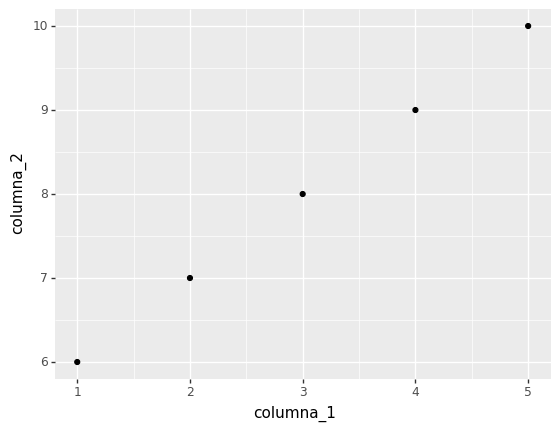

In [102]:
data = pd.DataFrame({
    'columna_1' : [1, 2, 3, 4, 5],
    'columna_2' : [6, 7, 8, 9, 10],
    'columna_letras' : ['a', 'a', 'd', 'd', 'e'],
})

graph = pn.ggplot(data, pn.aes(x='columna_1', y='columna_2')) + pn.geom_point()

graph.draw();

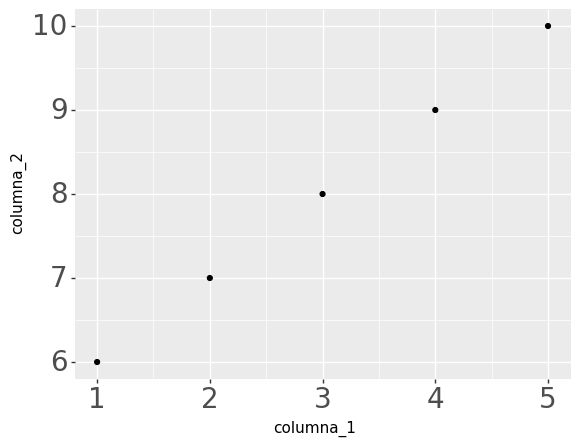

In [89]:
graph = pn.ggplot(data, pn.aes(x='columna_1', y='columna_2')) + pn.geom_point() + pn.theme(axis_text=pn.element_text(size=20))

graph.draw();

## Los geometrias más comunes

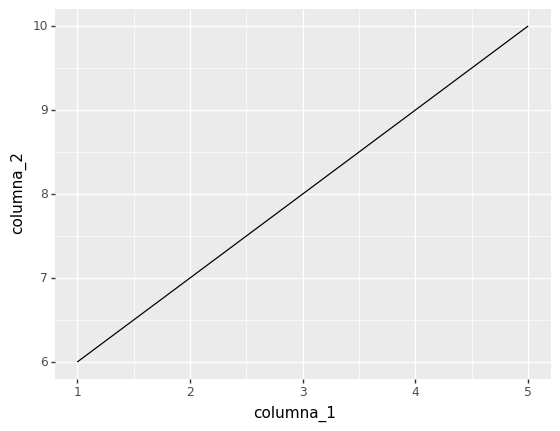

In [90]:
graph = pn.ggplot(data, pn.aes(x='columna_1', y='columna_2')) + pn.geom_line()

graph.draw();

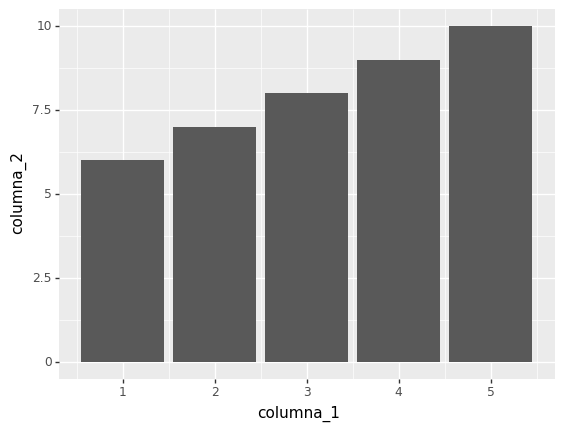

In [91]:
graph = pn.ggplot(data, pn.aes(x='columna_1', y='columna_2')) + pn.geom_col()

graph.draw();

/home/andreas/anaconda3/lib/python3.6/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 2'. Pick better value with 'binwidth'.


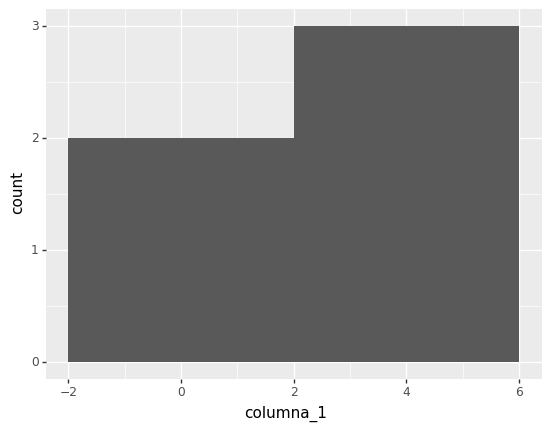

In [92]:
graph = pn.ggplot(data, pn.aes(x='columna_1')) + pn.geom_histogram()

graph.draw();

## Otras cosas...

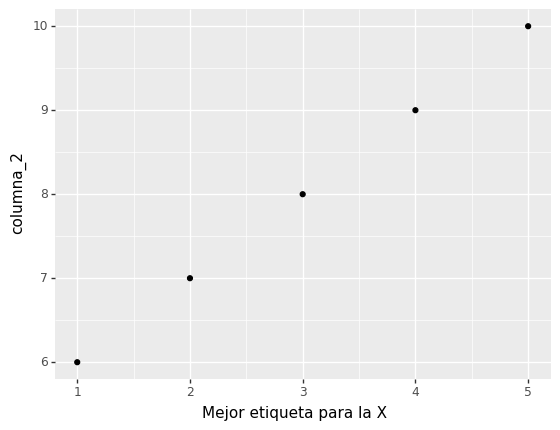

In [95]:
# cambiar las etiquetas
graph = pn.ggplot(data, pn.aes(x='columna_1', y='columna_2')) + pn.geom_point() + pn.xlab('Mejor etiqueta para la X')

graph.draw();

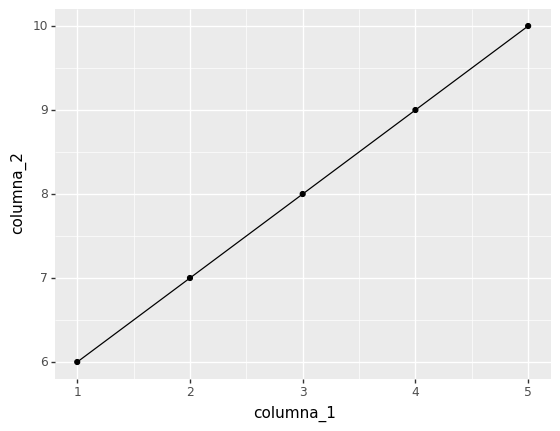

In [96]:
# Combinar geometrias
graph = pn.ggplot(data, pn.aes(x='columna_1', y='columna_2')) + pn.geom_line() + pn.geom_point()

graph.draw();

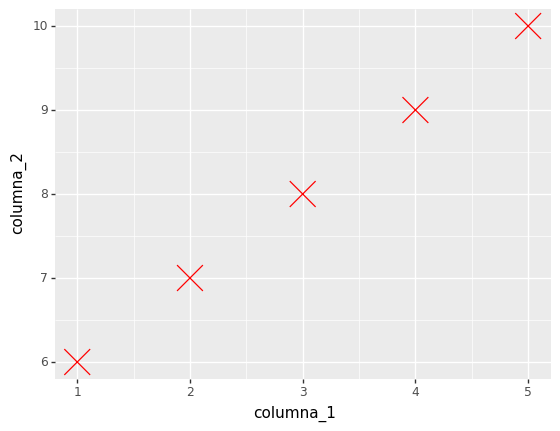

In [98]:
# Darle un poco de estilo
graph = pn.ggplot(data, pn.aes(x='columna_1', y='columna_2')) + pn.geom_point(color='red', size=10, shape='x')

graph.draw();

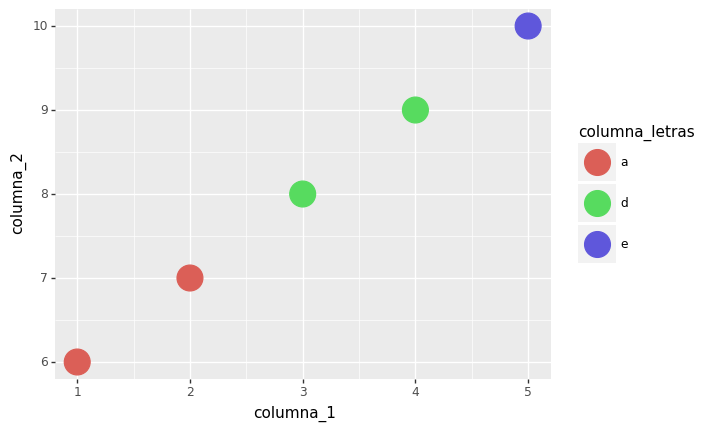

In [103]:
# Color por variables
graph = pn.ggplot(data, pn.aes(x='columna_1', y='columna_2', color='columna_letras')) + pn.geom_point(size=10)

graph.draw();

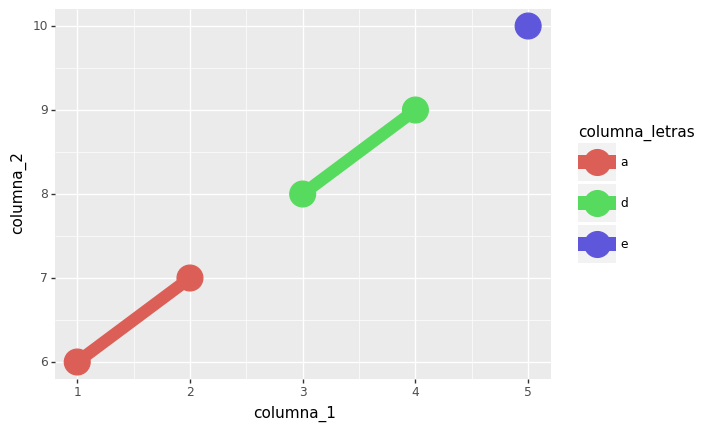

In [107]:
# Color por variables
graph = pn.ggplot(data, pn.aes(x='columna_1', y='columna_2', color='columna_letras')) + pn.geom_line(size=5) + pn.geom_point(size=10)

graph.draw();